<h1>Tarea</h1>
<h3>Interacciones que Conducen a Recomendaciones: Un Sistema de Recomendación de Artículos</h3>

<b>Integrantes:</b>
- Adrián Bedón
- Jairo Bedón
- Andrea Cobos
- Xavier Ramos

<h1>Contexto</h1>

En el panorama empresarial actual, la colaboración y el intercambio de conocimientos son cruciales. Plataformas como Deskdrop facilitan esto al permitir a los empleados compartir información relevante. Deskdrop, desarrollado por una empresa líder en tecnología, es una plataforma dinámica donde los profesionales comparten artículos y recursos. Además de difundir información, fomenta la colaboración y el diálogo entre equipos, impulsando la innovación y el crecimiento.

Para mejorar la experiencia del usuario, se propone un sistema de recomendación inteligente basado en algoritmos avanzados. Este sistema utiliza el análisis de contenido y el comportamiento del usuario para ofrecer recomendaciones personalizadas. El artículo explora el diseño e implementación de este sistema y su impacto en Deskdrop, mostrando cómo las interacciones de los usuarios, combinadas con técnicas de aprendizaje automático y procesamiento de lenguaje natural, generan recomendaciones precisas y contextualizadas.

El estudio se basa en datos de 12 meses de Deskdrop, que incluyen alrededor de 73,000 interacciones de usuarios y más de 3,000 artículos compartidos. Estos datos detallan atributos de artículos y registros de interacciones de usuarios, lo que permite un seguimiento a largo plazo de preferencias. El entorno de datos ofrece una oportunidad única para comprender las dinámicas de interacción y desarrollar sistemas de recomendación que mejoren la experiencia del usuario y la relevancia del contenido compartido.

<h1>Asignación</h1>

Después de revisar el cuaderno sobre "Interacciones que Conducen a Recomendaciones: Un Sistema de Recomendación de Artículos", tenemos el objetivo de desarrollar un sistema de recomendación basado en Big Data para la plataforma Deskdrop con el fin de presentar artículos relevantes y de interés para cada usuario, mejorando así su experiencia y participación en la plataforma.. Posteriormente, evalúa y compara ambos modelos para seleccionar el más eficaz. Finalmente, prueba el modelo seleccionado en el conjunto de datos de pruebas para determinar los productos que necesitan ser reordenados.


Como experto en Big Data, se le solicita desarrollar este sistema de recomendación utilizando técnicas avanzadas de análisis de datos y aprendizaje automático. El sistema deberá analizar los datos de interacción de los usuarios con la plataforma, así como las características de los artículos compartidos, para generar recomendaciones precisas y contextualizadas.

<h1>Tareas</h1>

- Recopilación y análisis de datos: Obtener y analizar datos históricos de interacción de los usuarios con la plataforma, incluyendo información sobre artículos compartidos, comentarios, me gusta, y visualizaciones.
- Preprocesamiento de datos: Limpiar y preparar los datos para su posterior análisis, incluyendo la normalización de texto y la extracción de características relevantes.
- Desarrollo de algoritmos de recomendación: Diseñar y desarrollar algoritmos de recomendación basados en técnicas de filtrado colaborativo, filtrado basado en contenido, o una combinación de ambos.
- Evaluación del sistema: Evaluar el rendimiento del sistema de recomendación utilizando métricas adecuadas, como precisión, cobertura y diversidad.
- Implementación del sistema: Implementar el sistema de recomendación en la plataforma [Nombre de la Plataforma], asegurando su integración sin problemas con la infraestructura existente.
- Optimización y ajuste: Realizar ajustes y optimizaciones en el sistema de recomendación según sea necesario para mejorar su rendimiento y precisión.

<h1>Código en Python</h1>

En esta sección, es fundamental cargar las diferentes bibliotecas que se utilizarán en el estudio para garantizar un análisis efectivo y eficiente de los datos. A continuación, se proporciona un ejemplo de cómo podrías cargar estas bibliotecas en Python

In [1]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import seaborn as sns
from matplotlib import pyplot as plt
import re

Después, procedemos a cargar los datos utilizando la biblioteca Pandas. Puedes descargar los datos desde el aula virtual o el repositorio de <a href='https://drive.google.com/file/d/1b2o9RS4jty1ATkxszRQlmEEEdQfbM2IU/view?usp=drive_link'>datos</a>, dependiendo de tu preferencia. 

Primero cargamos y visalizamo los datos de los artículos.

In [2]:
RANDOMSEED=56

adf = pd.read_csv(r'C:\Users\arbed\Downloads\articlerecsys\shared_articles.csv')
display(adf.shape)
display(adf.head())


(3122, 13)

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


Luego cargamos el conjunto de datos de users_interactions que contiene registros de interacciones de usuarios en artículos compartidos. Se puede relacionar con articles_shared.csv mediante la columna contentId.

In [3]:
uidf = pd.read_csv(r'C:\Users\arbed\Downloads\articlerecsys\users_interactions.csv')
display(uidf.shape)
display(uidf.head())

(72312, 8)

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


<h1>Análisis exploratorio de datos</h1>

Debemos convertir los datos de timestamp al formato de datetime para las interacciones de los usuarios


In [4]:
uidf['datetime'] = pd.to_datetime(uidf['timestamp'], unit='s')



Nos interesa graficar el número de interacciones por día

<Axes: title={'center': 'Número de interacciones por día'}, xlabel='Fecha', ylabel='Cantidad de Interacciones'>

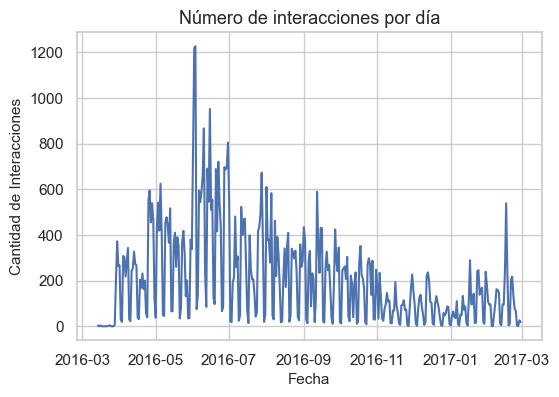

In [5]:
gdf = uidf.groupby([pd.Grouper(key='datetime', freq='D')]).agg({'eventType':'count'}).reset_index()

sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
plt.title('Número de interacciones por día', fontsize=13)
plt.xlabel('Fecha', fontsize=11)
plt.ylabel('Cantidad de Interacciones', fontsize=11)
sns.lineplot(data=gdf, y="eventType", x='datetime')

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>La gráfica muestra la interacción de los usuarios con la plataforma, mostrando que entre mayo y julio de 2016 la interacción alcanzó picos interesantes, y a inicios del 2017 parecería que la plataforma iba perdiendo popularidad con sus usuarios.</i></p>
</div>

Debemos convertir los datos de timestamp al formato de datetime para los artículos

Nos interesa graficar el número de artículos por día

<Axes: title={'center': 'Número de artículos compartidos por día'}, xlabel='Fecha', ylabel='Cantidad de Artículos'>

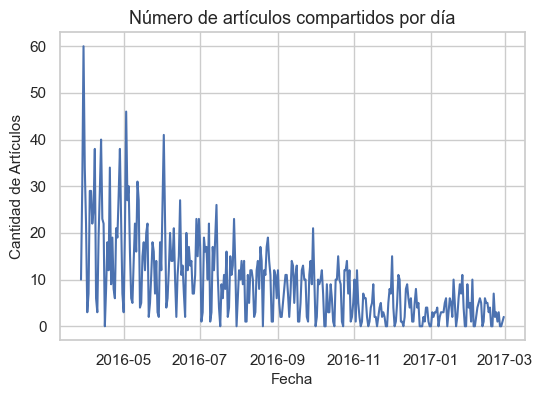

In [6]:
adf['datetime'] = pd.to_datetime(adf['timestamp'], unit='s')
gdf = adf.groupby([pd.Grouper(key='datetime', freq='D')]).agg({'eventType':'count'}).reset_index()

sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
plt.title('Número de artículos compartidos por día', fontsize=13)
plt.xlabel('Fecha', fontsize=11)
plt.ylabel('Cantidad de Artículos', fontsize=11)
sns.lineplot(data=gdf, y="eventType", x='datetime')

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Como se puede observar en la gráfica desde mayo de 2016 a marzo del 2017 el número de artículos compartidos ha ido en descenso, por lo cual podríamos considerar dos escenarios:
<ol><li>No tendremos datos para crear un buen modelo de recomendaciones ya que los usuarios están dejando de usar la plataforma.</li>
<li>Tenemos datos más confiables para que el modelo de recomendaciones sea más preciso debido a que los usuarios han mejorado su experticia al momento de compartir un artículo.</li></ol></i></p>
</div>

<h2>Categorización de los datos</h2>

Dado que hay diversos tipos de interacciones, asignamos a cada una un peso o fuerza, suponiendo que, por ejemplo, un comentario en un artículo refleja un mayor interés por parte del usuario que un "me gusta" o una simple vista. Modifica los valores para representar la fuerza que entiendas.

In [7]:
event_strength = {
   'VIEW': 1,
   'LIKE': 2, 
   'BOOKMARK': 3, 
   'FOLLOW': 4,
   'COMMENT CREATED': 5,  
}

uidf['eventStrength'] = uidf['eventType'].apply(lambda x: event_strength[x])
display(uidf.head())

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,datetime,eventStrength
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,2016-06-08 19:10:32,1
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,2016-06-08 19:02:40,1
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN,2016-06-08 20:03:10,1
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN,2016-06-08 19:24:55,4
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN,2016-06-08 18:58:10,1


Determina los usuarios que tienen mas de 5 interacciones.

In [8]:
display('Número total de usuarios que han interactuado en la plataforma: %d' % len(uidf['personId'].unique()))

count_ui = uidf.groupby(['personId', 'contentId']).size().groupby('personId').size()
users5i_df = count_ui[count_ui >= 5].reset_index()[['personId']]
display('Cantidad total de usuarios que han realizado al menos 5 interacciones en la plataforma: %d' % len(users5i_df))

'Número total de usuarios que han interactuado en la plataforma: 1895'

'Cantidad total de usuarios que han realizado al menos 5 interacciones en la plataforma: 1140'

Determinar la cantidad de interacciones de los usuarios que tienen mas 5 interacciones.

In [9]:
display('Número total de interacciones en la plataforma: %d' % len(uidf))
uidf= uidf[uidf['personId'].isin(users5i_df['personId'].tolist())]
display('Cantidad total de interacciones de usuarios que han realizado al menos 5 interacciones en la plataforma: %d' % len(uidf))
display(uidf.head())

'Número total de interacciones en la plataforma: 72312'

'Cantidad total de interacciones de usuarios que han realizado al menos 5 interacciones en la plataforma: 69868'

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,datetime,eventStrength
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,2016-06-08 19:10:32,1
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,2016-06-08 19:02:40,1
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN,2016-06-08 20:03:10,1
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN,2016-06-08 19:24:55,4
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN,2016-06-08 18:58:10,1


In [10]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
idf = uidf.groupby(['personId', 'contentId'])['eventStrength'].sum().apply(smooth_user_preference).reset_index()
display('Número de interacciones distintas entre usuario y artículo.: %d' % len(idf))
display(idf.head())

'Número de interacciones distintas entre usuario y artículo.: 39106'

,personId,contentId,eventStrength
0,-9223121837663643404,-8949113594875411859,1.000000
1,-9223121837663643404,-8377626164558006982,1.000000
2,-9223121837663643404,-8208801367848627943,1.000000
3,-9223121837663643404,-8187220755213888616,1.000000
4,-9223121837663643404,-7423191370472335463,3.169925


<h1>Divide tu data para entrenar el modelo y poder hacer pruebas de los modelos</h1>

In [11]:
train_df, val_df = train_test_split(idf, stratify=idf['personId'], test_size=0.2, random_state=RANDOMSEED)

display(train_df.shape)
display(val_df.shape)
display(train_df.head())

(31284, 3)

(7822, 3)

,personId,contentId,eventStrength
24048,1949009070102523745,5484061377044071389,1.000000
11918,-2979881261169775358,-986027724303592548,1.000000
20721,674947025087085832,-133139342397538859,2.000000
13220,-2626634673110551643,3547081132182529111,1.584963
23635,1895326251577378793,-4095842175692097942,1.000000


Indexa los datos para mejor performance.

In [12]:
idf = idf.set_index('personId')
train_df = train_df.set_index('personId')
val_df = val_df.set_index('personId')
display(idf.head())

,contentId,eventStrength
personId,,
-9223121837663643404,-8949113594875411859,1.000000
-9223121837663643404,-8377626164558006982,1.000000
-9223121837663643404,-8208801367848627943,1.000000
-9223121837663643404,-8187220755213888616,1.000000
-9223121837663643404,-7423191370472335463,3.169925


<h1>Entrenamiento de los modelos</h1>

<h2>Basado en Popularidad </h2>



In [13]:
pop_df = idf.groupby('contentId')['eventStrength'].sum().sort_values(ascending=False).reset_index()
pop_df.head()
    

,contentId,eventStrength
0,-4029704725707465084,310.791362
1,-6783772548752091658,237.145410
2,-133139342397538859,229.089057
3,-8208801367848627943,199.660338
4,-6843047699859121724,196.174998


Revisa las funciones que utilizamos para evaluar los modelos.


In [14]:
def get_items_interacted(person_id, interactions):
    interacted_items = interactions.loc[person_id]['contentId']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [15]:
def recommend_items(user_id, items_to_ignore=[], verbose=False):
    # Recommend the more popular items that the user hasn't seen yet.
    recommendations_df = pop_df[~pop_df['contentId'].isin(items_to_ignore)].sort_values('eventStrength', ascending = False)

    if verbose:
            recommendations_df = recommendations_df.merge(adf, how = 'left', on = 'contentId')[['eventStrength', 'contentId', 'title', 'url', 'lang']]
            
    return recommendations_df

In [16]:
def get_not_interacted_items_sample(person_id, sample_size, seed=RANDOMSEED):
    interacted_items = get_items_interacted(person_id, idf)
    all_items = set(adf['contentId'])
    non_interacted_items = all_items - interacted_items

    random.seed(seed)
    non_interacted_items_sample = random.sample(sorted(non_interacted_items), sample_size)
    return set(non_interacted_items_sample)

In [17]:
def verify_hit_top_n(item_id, recommended_items, topn):        
        try:
            index = next(i for i, c in enumerate(recommended_items) if c == item_id)
        except:
            index = -1
        hit = int(index in range(0, topn))
        return hit, index

In [18]:

def evaluate_model_for_user(person_id):
    interacted_values_testset = val_df.loc[person_id]
    if type(interacted_values_testset['contentId']) == pd.Series:
        person_interacted_items_testset = set(interacted_values_testset['contentId'])
    else:
        person_interacted_items_testset = set([int(interacted_values_testset['contentId'])])  
    
    interacted_items_count_testset = len(person_interacted_items_testset) 

    person_recs_df = recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, train_df))

    hits_at_5_count = 0
    hits_at_10_count = 0
    for item_id in person_interacted_items_testset:
        non_interacted_items_sample = get_not_interacted_items_sample(person_id, sample_size=100, seed=RANDOMSEED)

        items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

        valid_recs_df = person_recs_df[person_recs_df['contentId'].isin(items_to_filter_recs)]                    
        valid_recs = valid_recs_df['contentId'].values
        hit_at_5, index_at_5 = verify_hit_top_n(item_id, valid_recs, 5)
        hits_at_5_count += hit_at_5
        hit_at_10, index_at_10 = verify_hit_top_n(item_id, valid_recs, 10)
        hits_at_10_count += hit_at_10

    recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
    recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

    person_metrics = {'hits@5_count':hits_at_5_count, 
                        'hits@10_count':hits_at_10_count, 
                        'interacted_count': interacted_items_count_testset,
                        'recall@5': recall_at_5,
                        'recall@10': recall_at_10}
    return person_metrics


Vamos a definir el primer modelo a entrenar.

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Este primer modelo lo podemos utilizar como una línea base debido a que en el recall del top 5 y 10 de recomendaciones para los usuarios, vemos que mantiene métricas sólidas de un 24% y 36% respectivamente, esto nos indica que en promedio los usuarios interactúan entre un cuarto y un tercio de las recomendaciones dadas. Sin embargo, al no analizar directamente el comportamiento personalizado de cada persona y enfocarse en la popularidad global del contenido vemos que se pierde poder de predicción que se puede refinar y ganar mediante la aplicación de otros modelos.</i></p>
</div>

In [19]:
people_metrics = []
for idx, person_id in enumerate(list(val_df.index.unique().values)):
    person_metrics = evaluate_model_for_user(person_id)  
    person_metrics['_person_id'] = person_id
    people_metrics.append(person_metrics)

popularity_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)

popularity_recall_at_5 = popularity_df['hits@5_count'].sum() / float(popularity_df['interacted_count'].sum())
popularity_recall_at_10 = popularity_df['hits@10_count'].sum() / float(popularity_df['interacted_count'].sum())

popularity_metrics = {'modelName': 'Popularity',
                    'recall@5': popularity_recall_at_5,
                    'recall@10': popularity_recall_at_10}    

display('Métricas de evaluación del modelo de popularidad incluyen el recall para los top 5 y top 10 recomendaciones %s' % popularity_metrics)
popularity_df.head()

"Métricas de evaluación del modelo de popularidad incluyen el recall para los top 5 y top 10 recomendaciones {'modelName': 'Popularity', 'recall@5': np.float64(0.2411148043978522), 'recall@10': np.float64(0.36167220659677835)}"

,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
11,18,49,192,0.093750,0.255208,3609194402293569455
18,20,35,134,0.149254,0.261194,-2626634673110551643
95,24,29,130,0.184615,0.223077,-1032019229384696495
112,2,6,117,0.017094,0.051282,-1443636648652872475
22,22,44,88,0.250000,0.500000,-2979881261169775358




<h2>Basado en Contenido</h2>

Revisa las funciones que utilizamos para evaluar los modelos.

In [20]:
stopwords_list = stopwords.words('english')

vectorizer = TfidfVectorizer(analyzer='word',
                     ngram_range=(1, 2),
                     min_df=0.003,
                     max_df=0.5,
                     max_features=5000,
                     stop_words=stopwords_list)

item_ids = adf['contentId'].tolist()
tfidf_matrix = vectorizer.fit_transform(adf['title'] + "" + adf['text'])
tfidf_feature_names = vectorizer.get_feature_names_out()
display(tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 692598 stored elements and shape (3122, 5000)>

In [21]:
def get_item_profile(item_id):
    idx = item_ids.index(item_id)
    item_profile = tfidf_matrix[idx:idx+1]
    return item_profile

In [22]:
def get_item_profiles(ids):
    item_profiles_list = [get_item_profile(x) for x in ids]
    item_profiles = scipy.sparse.vstack(item_profiles_list)
    return item_profiles

In [23]:
def build_users_profile(person_id, interactions_indexed_df):
    interactions_person_df = interactions_indexed_df.loc[person_id]
    user_item_profiles = get_item_profiles(interactions_person_df['contentId'])
    
    
    user_item_strengths = np.array(interactions_person_df['eventStrength']).reshape(-1,1)
    #Weighted average of item profiles by the interactions strength
    user_item_strengths_weighted_avg = np.sum(user_item_profiles.multiply(user_item_strengths), axis=0) / np.sum(user_item_strengths)
    user_item_strengths_weighted_avg= np.asarray(user_item_strengths_weighted_avg) #np.matrix is not supported. Please convert to a numpy array with np.asarray.
    user_profile_norm = sklearn.preprocessing.normalize(user_item_strengths_weighted_avg)

    return user_profile_norm

In [24]:
def build_users_profiles(): 
    interactions_indexed_df = train_df[train_df['contentId'].isin(adf['contentId'])]
    user_profiles = {}
    for person_id in interactions_indexed_df.index.unique():
        user_profiles[person_id] = build_users_profile(person_id, interactions_indexed_df)
    return user_profiles

In [25]:

user_profiles = build_users_profiles()
len(user_profiles)

1140

In [26]:
def get_similar_items_to_user_profile(person_id, topn=1000):
    #Computes the cosine similarity between the user profile and all item profiles
    cosine_similarities = cosine_similarity(user_profiles[person_id], tfidf_matrix)
    #Gets the top similar items
    similar_indices = cosine_similarities.argsort().flatten()[-topn:]
    #Sort the similar items by similarity
    similar_items = sorted([(item_ids[i], cosine_similarities[0,i]) for i in similar_indices], key=lambda x: -x[1])
    return similar_items

In [27]:
def recommend_cont_items(user_id, items_to_ignore=[], verbose=False):
    similar_items = get_similar_items_to_user_profile(user_id)
    #Ignores items the user has already interacted
    similar_items_filtered = list(filter(lambda x: x[0] not in items_to_ignore, similar_items))        
    recommendations_df = pd.DataFrame(similar_items_filtered, columns=['contentId', 'recStrength'])

    if verbose:
            recommendations_df = recommendations_df.merge(adf, how = 'left', on = 'contentId')[['recStrength', 'contentId', 'title', 'url', 'lang']]
            
    return recommendations_df

In [28]:
def evaluate_cont_model_for_user(person_id):
    interacted_values_testset = val_df.loc[person_id]
    if type(interacted_values_testset['contentId']) == pd.Series:
        person_interacted_items_testset = set(interacted_values_testset['contentId'])
    else:
        person_interacted_items_testset = set([int(interacted_values_testset['contentId'])])  
    
    interacted_items_count_testset = len(person_interacted_items_testset) 

    person_recs_df = recommend_cont_items(person_id, items_to_ignore=get_items_interacted(person_id, train_df))

    hits_at_5_count = 0
    hits_at_10_count = 0
    for item_id in person_interacted_items_testset:
        non_interacted_items_sample = get_not_interacted_items_sample(person_id, sample_size=100, seed=RANDOMSEED)

        items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

        valid_recs_df = person_recs_df[person_recs_df['contentId'].isin(items_to_filter_recs)]                    
        valid_recs = valid_recs_df['contentId'].values
        hit_at_5, index_at_5 = verify_hit_top_n(item_id, valid_recs, 5)
        hits_at_5_count += hit_at_5
        hit_at_10, index_at_10 = verify_hit_top_n(item_id, valid_recs, 10)
        hits_at_10_count += hit_at_10

    recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
    recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

    person_metrics = {'hits@5_count':hits_at_5_count, 
                        'hits@10_count':hits_at_10_count, 
                        'interacted_count': interacted_items_count_testset,
                        'recall@5': recall_at_5,
                        'recall@10': recall_at_10}
    return person_metrics

Vamos a definir el modelo basado en contenido a entrenar

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>El segundo modelo basado en contenido vemos que presenta un deterioro en las métricas analizadas, a diferencia del primer modelo, el recall del top 5 y 10 de recomendaciones llega a un 9.6% y 16.6% respectivamente. Con este modelo, apenas uno de cada diez ítems relevantes son los que el usuario acaba consumiendo, si bien estas métricas empeoran en relación con el primer modelo, el hecho que se base en contenido puede tener sus aplicaciones como evitar dar recomendaciones de ítems ya consumidos, dar una mayor diversidad a la hora de recomendar contenido y con nuevos usuarios debido a la relativa menor información.</i></p>
</div>

In [29]:


people_metrics = []
for idx, person_id in enumerate(list(val_df.index.unique().values)):
    person_metrics = evaluate_cont_model_for_user(person_id)  
    person_metrics['_person_id'] = person_id
    people_metrics.append(person_metrics)

content_df = pd.DataFrame(people_metrics) \
                    .sort_values('interacted_count', ascending=False)

content_recall_at_5 = content_df['hits@5_count'].sum() / float(content_df['interacted_count'].sum())
content_recall_at_10 = content_df['hits@10_count'].sum() / float(content_df['interacted_count'].sum())

content_metrics = {'modelName': 'Content',
                    'recall@5': content_recall_at_5,
                    'recall@10': content_recall_at_10}    

print('Métricas de evaluación del modelo de contenido incluyen el recall para los top 5 y top 10 recomendaciones %s' % content_metrics)
content_df.head()

Métricas de evaluación del modelo de contenido incluyen el recall para los top 5 y top 10 recomendaciones {'modelName': 'Content', 'recall@5': np.float64(0.09626693940168755), 'recall@10': np.float64(0.16619790334952697)}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
11,9,24,192,0.046875,0.125000,3609194402293569455
18,14,17,134,0.104478,0.126866,-2626634673110551643
95,14,21,130,0.107692,0.161538,-1032019229384696495
112,21,37,117,0.179487,0.316239,-1443636648652872475
22,1,2,88,0.011364,0.022727,-2979881261169775358


<h2>Colaborativo</h2>


Revisa las funciones que utilizamos para evaluar los modelos.

In [30]:
users_items_pivot_matrix_df = train_df.pivot(columns='contentId', values='eventStrength').fillna(0)
users_items_pivot_matrix_df.head()

contentId,-9222795471790223670,-9216926795620865886,-9194572880052200111,-9192549002213406534,-9190737901804729417,-9189659052158407108,-9176143510534135851,-9172673334835262304,-9171475473795142532,-9166778629773133902,...,9191014301634017491,9207286802575546269,9208127165664287660,9209629151177723638,9209886322932807692,9213260650272029784,9215261273565326920,9217155070834564627,9220445660318725468,9222265156747237864
personId,,,,,,,,,,,,,,,,,,,,,
-9223121837663643404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9212075797126931087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9207251133131336884,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9199575329909162940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9196668942822132778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(10, 2933))

In [32]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[-9223121837663643404,
 -9212075797126931087,
 -9207251133131336884,
 -9199575329909162940,
 -9196668942822132778,
 -9188188261933657343,
 -9172914609055320039,
 -9156344805277471150,
 -9120685872592674274,
 -9109785559521267180]

In [33]:
users_items_pivot_sparse_matrix = csr_matrix(users_items_pivot_matrix)
users_items_pivot_sparse_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 31284 stored elements and shape (1140, 2933)>

In [34]:

NUMBER_OF_FACTORS_MF = 15

U, sigma, Vt = svds(users_items_pivot_sparse_matrix, k = NUMBER_OF_FACTORS_MF)
sigma = np.diag(sigma)

display(U.shape)
display(sigma.shape)
display(Vt.shape)

(1140, 15)

(15, 15)

(15, 2933)

In [35]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings_norm = (all_user_predicted_ratings - all_user_predicted_ratings.min()) / (all_user_predicted_ratings.max() - all_user_predicted_ratings.min())

all_user_predicted_ratings

array([[ 2.94667020e-02,  4.93885526e-03,  1.28018121e-03, ...,
        -9.09729040e-03,  5.99877754e-03,  1.40575945e-02],
       [-4.44632455e-03, -2.18388164e-05,  9.59987173e-04, ...,
        -1.41047651e-03,  3.20689876e-03, -2.00091676e-03],
       [ 4.90513076e-04,  4.03790972e-03, -9.40657964e-03, ...,
        -1.01333661e-02, -6.93933329e-03,  8.44187360e-03],
       ...,
       [-4.60828857e-03,  4.77904709e-03, -1.90762688e-02, ...,
        -1.53475351e-02,  1.10353188e-02,  8.00425652e-03],
       [ 3.28790777e-03,  6.72707320e-03,  3.04986211e-02, ...,
         4.37526695e-03,  1.59733025e-02, -8.99730900e-03],
       [-1.15786832e-02,  3.72401824e-03,  1.35237401e-01, ...,
        -2.41099795e-02,  7.05812331e-02,  2.19330186e-02]],
      shape=(1140, 2933))

In [36]:
cf_preds_df = pd.DataFrame(all_user_predicted_ratings_norm, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,-9223121837663643404,-9212075797126931087,-9207251133131336884,-9199575329909162940,-9196668942822132778,-9188188261933657343,-9172914609055320039,-9156344805277471150,-9120685872592674274,-9109785559521267180,...,9105269044962898535,9109075639526981934,9135582630122950040,9137372837662939523,9148269800512008413,9165571805999894845,9187866633451383747,9191849144618614467,9199170757466086545,9210530975708218054
contentId,,,,,,,,,,,,,,,,,,,,,
-9222795471790223670,0.150212,0.146560,0.147092,0.148337,0.146601,0.146878,0.149151,0.152615,0.146305,0.149143,...,0.147453,0.146457,0.146902,0.147245,0.140211,0.146613,0.145355,0.146543,0.147393,0.145792
-9216926795620865886,0.147571,0.147036,0.147474,0.146918,0.147145,0.147098,0.147006,0.147136,0.146675,0.147360,...,0.147466,0.148529,0.147079,0.147081,0.149282,0.147250,0.147412,0.147553,0.147763,0.147440
-9194572880052200111,0.147177,0.147142,0.146026,0.146708,0.149429,0.146783,0.148570,0.146120,0.147407,0.147783,...,0.148641,0.157407,0.148216,0.149137,0.164455,0.149320,0.149914,0.144985,0.150323,0.161600
-9192549002213406534,0.150169,0.146726,0.143489,0.145918,0.149082,0.147483,0.149271,0.153545,0.152539,0.145243,...,0.147883,0.164908,0.147310,0.146395,0.154094,0.149431,0.147372,0.144608,0.149699,0.163114
-9190737901804729417,0.148437,0.146959,0.148570,0.146945,0.146948,0.147318,0.146940,0.147133,0.145162,0.148536,...,0.148110,0.149376,0.147177,0.147030,0.145854,0.147096,0.147297,0.148634,0.148909,0.146765


In [37]:
def recommend_collab_items(user_id, items_to_ignore=[], verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = cf_preds_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating movies that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['contentId'].isin(items_to_ignore)].sort_values('recStrength', ascending = False)

        if verbose:
            recommendations_df = recommendations_df.merge(adf, how = 'left', on = 'contentId')[['recStrength', 'contentId', 'title', 'url', 'lang']]


        return recommendations_df

In [38]:
def evaluate_collab_model_for_user(person_id):
    interacted_values_testset = val_df.loc[person_id]
    if type(interacted_values_testset['contentId']) == pd.Series:
        person_interacted_items_testset = set(interacted_values_testset['contentId'])
    else:
        person_interacted_items_testset = set([int(interacted_values_testset['contentId'])])  
    
    interacted_items_count_testset = len(person_interacted_items_testset) 

    person_recs_df = recommend_collab_items(person_id, items_to_ignore=get_items_interacted(person_id, train_df))

    hits_at_5_count = 0
    hits_at_10_count = 0

    for item_id in person_interacted_items_testset:
        non_interacted_items_sample = get_not_interacted_items_sample(person_id, sample_size=100, seed=RANDOMSEED)

        items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

        valid_recs_df = person_recs_df[person_recs_df['contentId'].isin(items_to_filter_recs)]                    
        valid_recs = valid_recs_df['contentId'].values
        hit_at_5, index_at_5 = verify_hit_top_n(item_id, valid_recs, 5)
        hits_at_5_count += hit_at_5
        hit_at_10, index_at_10 = verify_hit_top_n(item_id, valid_recs, 10)
        hits_at_10_count += hit_at_10

    recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
    recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

    person_metrics = {'hits@5_count':hits_at_5_count, 
                        'hits@10_count':hits_at_10_count, 
                        'interacted_count': interacted_items_count_testset,
                        'recall@5': recall_at_5,
                        'recall@10': recall_at_10}
    return person_metrics

Vamos a definir el modelo Colaborativo a entrenar. 

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>En el modelo colaborativo, podemos apreciar, que presenta las mejores métricas hasta el momento, llegando a un recall para el top 5 y 10 de recomendaciones de un 32% y 46% respectivamente, una mejora sustancial en comparación a los anteriores modelos probados.  Casi la mitad del contenido consumido por los usuarios aparece en recomendado en el top 10. Esto nos puede indicar que las preferencias de los usuarios se ven altamente influenciadas por patrones de comportamiento de consumo compartido, el contenido que se captura de esta manera captura mejor las características únicas de cada grupo de usuarios antes que realizando un análisis del contenido directamente.</i></p>
</div>

In [39]:
people_metrics = []
for idx, person_id in enumerate(list(val_df.index.unique().values)):
    person_metrics = evaluate_collab_model_for_user(person_id)  
    person_metrics['_person_id'] = person_id
    people_metrics.append(person_metrics)

collaborative_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)

collaborative_recall_at_5 = collaborative_df['hits@5_count'].sum() / float(collaborative_df['interacted_count'].sum())
collaborative_recall_at_10 = collaborative_df['hits@10_count'].sum() / float(collaborative_df['interacted_count'].sum())

collaborative_metrics = {'modelName': 'Collaborative',
                    'recall@5': collaborative_recall_at_5,
                    'recall@10': collaborative_recall_at_10}    

print('Métricas de evaluación del modelo colaborativo incluyen el recall para los top 5 y top 10 recomendaciones %s' % collaborative_metrics)
collaborative_df.head()

Métricas de evaluación del modelo colaborativo incluyen el recall para los top 5 y top 10 recomendaciones {'modelName': 'Collaborative', 'recall@5': np.float64(0.3207619534645871), 'recall@10': np.float64(0.45793914599846586)}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
11,37,67,192,0.192708,0.348958,3609194402293569455
18,35,45,134,0.261194,0.335821,-2626634673110551643
95,18,28,130,0.138462,0.215385,-1032019229384696495
112,31,41,117,0.264957,0.350427,-1443636648652872475
22,34,50,88,0.386364,0.568182,-2979881261169775358


<h2>Métodos Híbridos</h2>

Revisa las funciones que utilizamos para evaluar los modelos.

In [40]:
def recommend_hybrid_items(person_id, items_to_ignore=[], cb_ensemble_weight=1, cf_ensemble_weight=100, verbose=False):
        cb_recs_df = recommend_cont_items(person_id, items_to_ignore=items_to_ignore).rename(columns={'recStrength': 'recStrengthCB'})
        cf_recs_df = recommend_collab_items(person_id, items_to_ignore=items_to_ignore).rename(columns={'recStrength': 'recStrengthCF'})
        recs_df = cb_recs_df.merge(cf_recs_df, how = 'outer', on = 'contentId').fillna(0.0)
        
        recs_df['recStrengthHybrid'] = (recs_df['recStrengthCB'] * cb_ensemble_weight) + (recs_df['recStrengthCF'] * cf_ensemble_weight)
        
        recommendations_df = recs_df.sort_values('recStrengthHybrid', ascending=False)

        if verbose:
            recommendations_df = recommendations_df.merge(adf, how = 'left', on = 'contentId')[['recStrengthHybrid', 'contentId', 'title', 'url', 'lang']]

        return recommendations_df

In [41]:
def evaluate_hybrid_model_for_user(person_id):
    interacted_values_testset = val_df.loc[person_id]
    if type(interacted_values_testset['contentId']) == pd.Series:
        person_interacted_items_testset = set(interacted_values_testset['contentId'])
    else:
        person_interacted_items_testset = set([int(interacted_values_testset['contentId'])])  
    
    interacted_items_count_testset = len(person_interacted_items_testset) 
    person_recs_df = recommend_hybrid_items(person_id, items_to_ignore=get_items_interacted(person_id, train_df))

    hits_at_5_count = 0
    hits_at_10_count = 0
    for item_id in person_interacted_items_testset:
        non_interacted_items_sample = get_not_interacted_items_sample(person_id, sample_size=100, seed=RANDOMSEED)

        items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

        valid_recs_df = person_recs_df[person_recs_df['contentId'].isin(items_to_filter_recs)]                    
        valid_recs = valid_recs_df['contentId'].values
        hit_at_5, index_at_5 = verify_hit_top_n(item_id, valid_recs, 5)
        hits_at_5_count += hit_at_5
        hit_at_10, index_at_10 = verify_hit_top_n(item_id, valid_recs, 10)
        hits_at_10_count += hit_at_10

    recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
    recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

    person_metrics = {'hits@5_count':hits_at_5_count, 
                        'hits@10_count':hits_at_10_count, 
                        'interacted_count': interacted_items_count_testset,
                        'recall@5': recall_at_5,
                        'recall@10': recall_at_10}
    return person_metrics

Vamos a definir el modelo hibrido a entrenar.

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>El modelo hibrido permite analizar simultáneamente el comportamiento individual y colectivo de consumo de los usuarios, de esta manera existe una mejora en el recall del top 5 y 10 de recomendaciones situándose en un 32.7% y 46.3% respectivamente, una ligera mejora del modelo colaborativo. De esta manera podemos decir que entre los dos enfoques, el colaborativo es el que más peso tiene al momento de dar las recomendaciones de los usuarios pero el agregar un análisis individual del comportamiento, puede aportar información para mejorar ligeramente las recomendaciones dadas al igual que ofrecer una experiencia mas personalizada.</i></p>
</div>

In [42]:
people_metrics = []
for idx, person_id in enumerate(list(val_df.index.unique().values)):
    #if idx % 100 == 0 and idx > 0:
    #    print('%d users processed' % idx)
    person_metrics = evaluate_hybrid_model_for_user(person_id)  
    person_metrics['_person_id'] = person_id
    people_metrics.append(person_metrics)

hybrid_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)

hybrid_recall_at_5 = hybrid_df['hits@5_count'].sum() / float(hybrid_df['interacted_count'].sum())
hybrid_recall_at_10 = hybrid_df['hits@10_count'].sum() / float(hybrid_df['interacted_count'].sum())

hybrid_metrics = {'modelName': 'Hybrid',
                    'recall@5': hybrid_recall_at_5,
                    'recall@10': hybrid_recall_at_10}    

print('Métricas de evaluación del modelo hibrido incluyen el recall para los top 5 y top 10 recomendaciones %s' % hybrid_metrics)
hybrid_df.head()

Métricas de evaluación del modelo hibrido incluyen el recall para los top 5 y top 10 recomendaciones {'modelName': 'Hybrid', 'recall@5': np.float64(0.32766555868064434), 'recall@10': np.float64(0.46343646126310406)}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
11,42,61,192,0.218750,0.317708,3609194402293569455
18,34,46,134,0.253731,0.343284,-2626634673110551643
95,21,27,130,0.161538,0.207692,-1032019229384696495
112,32,44,117,0.273504,0.376068,-1443636648652872475
22,34,45,88,0.386364,0.511364,-2979881261169775358


<h1>Resultado</h1>

Muestra un resumen de los resultados de todos los modelos

In [43]:
metrics = pd.DataFrame([popularity_metrics, content_metrics, collaborative_metrics, hybrid_metrics])
metrics

,modelName,recall@5,recall@10
0,Popularity,0.241115,0.361672
1,Content,0.096267,0.166198
2,Collaborative,0.320762,0.457939
3,Hybrid,0.327666,0.463436


<Axes: xlabel='modelName', ylabel='values'>

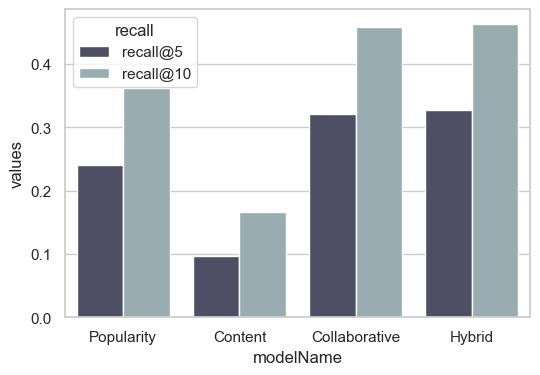

In [44]:
dfm = metrics.melt('modelName', var_name='recall', value_name='values')

sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})  #  elige la apariencia
sns.barplot(dfm, x="modelName", y="values", hue='recall', palette='bone')

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Como ya se ha venido analizando un modelo hibrido que se apoye de los comportamientos conjuntos de los usuarios y apoyándose en la popularidad del contenido nos puede ayudar a dar la mejor recomendación, permitiendo capturar los diferentes comportamientos únicos de las personas al igual que personalizar de la mejor manera su experiencia, logrando que alrededor de la mitad del contenido consumido sea recomendado por nuestro modelo.</i></p>
</div>

<h2>Pruebas</h2>

Realiza una pruebas del sistema de recomendación simulando ser el usuario -8845298781299428018 para evaluar las recomendaciones de cada modelo.

In [45]:
def inspect_interactions(person_id, test_set=True):
    if test_set:
        interactions_df = val_df
    else:
        interactions_df = train_df
    
    return interactions_df.loc[person_id].merge(adf, how = 'left', on = 'contentId') .sort_values('eventStrength', ascending = False)[['eventStrength', 'contentId','title', 'url', 'lang']]

In [46]:
inspect_interactions(-8845298781299428018, test_set=False).head()

,eventStrength,contentId,title,url,lang
74,4.643856,-8618420761918493321,What the Google I/O schedule tells us about th...,http://www.greenbot.com/article/3060757/androi...,en
16,4.392317,-1453783314552286835,Progressive Web App - first introduced on Goog...,https://flights.airberlin.com/en-DE/progressiv...,en
42,4.392317,1339353160969606996,Enable secure mode on your web product | Inter...,https://docs.intercom.io/configure-intercom-fo...,en
0,4.000000,-4228415104574264137,Up your app's sharing game with DirectShare - ...,https://medium.com/google-developers/up-your-a...,en
91,4.000000,-8279505492976427918,"Bots, Messenger and the future of customer ser...",http://techcrunch.com/2016/05/07/bots-messenge...,en


In [47]:
recommend_items(-8845298781299428018, verbose=True).head()

,eventStrength,contentId,title,url,lang
0,310.791362,-4029704725707465084,Former Google career coach shares a visual tri...,http://www.cnbc.com/2016/12/21/former-google-c...,en
1,237.145410,-6783772548752091658,Livro: Retrospectivas Divertidas,http://www.caroli.org/livro-retrospectivas-div...,pt
2,229.089057,-133139342397538859,"Novo workaholic trabalha, pratica esportes e t...",http://gq.globo.com/Prazeres/Poder/Carreira/no...,pt
3,199.660338,-8208801367848627943,Ray Kurzweil: The world isn't getting worse - ...,http://www.geekwire.com/2016/ray-kurzweil-worl...,en
4,196.174998,-6843047699859121724,"Ganhe 6 meses de acesso ao Pluralsight, maior ...",https://medium.com/@jeffersoncn/ganhe-6-meses-...,pt


In [48]:
recommend_cont_items(-8845298781299428018, verbose=True).head()

,recStrength,contentId,title,url,lang
0,0.498265,8596997246990922861,This year's Founders' Letter,https://googleblog.blogspot.com.br/2016/04/thi...,en
1,0.453993,3035329611795434601,Bots won't replace apps. Better apps will repl...,http://dangrover.com/blog/2016/04/20/bots-wont...,en
2,0.440866,-8618420761918493321,What the Google I/O schedule tells us about th...,http://www.greenbot.com/article/3060757/androi...,en
3,0.432350,-6308850935767965758,So long MVP. Hello Minimum Loveable Product.,https://medium.com/the-happy-startup-school/be...,en
4,0.428911,-4541461982704074404,Exclusive: Why Microsoft is betting its future...,http://www.theverge.com/2016/7/7/12111028/micr...,en


In [49]:
recommend_collab_items(-8845298781299428018, verbose=True).head()

,recStrength,contentId,title,url,lang
0,0.294153,-3716447017462787559,Squads não-suicidas - Hipsters #08,http://hipsters.tech/squads-nao-suicidas-hipst...,pt
1,0.282582,4241385837165861843,Understanding the Twitter topic Tracker,https://unionmetrics.zendesk.com/hc/en-us/arti...,en
2,0.279014,-1453783314552286835,Progressive Web App - first introduced on Goog...,https://flights.airberlin.com/en-DE/progressiv...,en
3,0.276165,5350829677696205474,2016 will be the year of conversational commer...,https://medium.com/chris-messina/2016-will-be-...,en
4,0.275527,-6380034335041404646,How the Communicator's Dilemma Made a 'Slack-l...,https://www.entrepreneur.com/article/282428,en


In [50]:
recommend_hybrid_items(-8845298781299428018, verbose=True).head()

,recStrengthHybrid,contentId,title,url,lang
0,29.415275,-3716447017462787559,Squads não-suicidas - Hipsters #08,http://hipsters.tech/squads-nao-suicidas-hipst...,pt
1,28.258168,4241385837165861843,Understanding the Twitter topic Tracker,https://unionmetrics.zendesk.com/hc/en-us/arti...,en
2,28.254895,-1453783314552286835,Progressive Web App - first introduced on Goog...,https://flights.airberlin.com/en-DE/progressiv...,en
3,28.003540,5350829677696205474,2016 will be the year of conversational commer...,https://medium.com/chris-messina/2016-will-be-...,en
4,27.847767,-6380034335041404646,How the Communicator's Dilemma Made a 'Slack-l...,https://www.entrepreneur.com/article/282428,en


<h1>Discusión y Conclusión</h1>

Presenta tus conclusiones sobre el trabajo llevado a cabo

- *El desarrollo de este modelo permite comparar distintas estrategias de recomendación y entender cuál ofrece la mejor capacidad para personalizar y mejorar la experiencia del usuario. Se construyeron modelos basados en popularidad, contenido, colaborativo y un enfoque híbrido. Los resultados de estos muestran que el modelo híbrido destaca como la solución más precisa, alcanzando una tasa de acierto cercana al 46.3% en el top 10 de recomendaciones de contenido, lo que refleja una capacidad importante al momento de anticipar los intereses reales del usuario.*
- *Al analizar las recomendaciones generadas para un usuario específico, se observó claramente cómo el enfoque híbrido logra entregar contenido altamente alineado con sus gustos e historial de consumo capturando patrones de comportamiento y preferencias compartidas entre usuarios y el caso analizado. Esto se traduce en recomendaciones más relevantes, útiles y ajustadas al perfil individual.*
- *Finalmente, los resultados corroboran que un sistema de recomendación construido sobre enfoques colaborativos e híbridos incrementa significativamente la personalización y mejora la experiencia general de consumo de contenido. Este tipo de soluciones permiten al usuario descubrir información relevante sin esfuerzo, aumentando el nivel de interacción, tiempo de uso y potencial fidelización. La implementación de estos modelos presenta una clara oportunidad para potenciar valor de negocio, ya que permite entregar contenidos más pertinentes, eficientes y orientados al interés real de cada persona.*